# Business Problem

We are a global superstore selling all kinds of products in the categories of furniture, technology and office supplies. We are interested in predicting our future sales to assist in inventory planning and optimizing pricing strategies.  

# Data Collection

We acquire superstore sales data from a kaggle dataset. 

In [470]:
# Installing packages
!pip install opendatasets -q

In [471]:
# Downloading the dataset
import opendatasets as od
import os

original_folder_name = "sales-forecasting"
new_folder_name = "sales-forecasting-dataset"

if not os.path.exists(new_folder_name):
    od.download("https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting")
    os.rename(original_folder_name, new_folder_name)

In [472]:
# Converting .csv file to pandas DataFrame
import pandas as pd

sales_df = pd.read_csv(f"{new_folder_name}/train.csv")
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [473]:
# Taking a look at number of rows and columns
sales_df.shape

(9800, 18)

In [474]:
# Attributes overview
# - Row ID: Unique identifier for each product sale.
# - Order ID: Order ID related to each product sale
# - Order Date: The date the order was placed.
# - Ship Date: The date the order was shipped.
# - Ship Mode: The type of shipping used to ship the order. 
# - Customer ID: The unique identifier for the customer. 
# - Customer name: The name of the customer
# - Segment: The type of customer, consumer, home office or corporate
# - Country: The country of the customer
# - City: The city of the customer
# - State: The state of the customer
# - Postal code: The postal code of the customer
# - Region: The region of the customer
# - Product ID: The unique identifier for the particular product
# - Category: The product category
# - Sub-Category: The product sub-category
# - Product Name: The name of the product
# - Sales: The price of the product

### Data Collection Overview
- We load the data from a kaggle dataset
- We notice that the sales target variable has a very high variation, which could make it difficult for predictive models to distinguish the pattern.

# Data Understanding: Exploratory Data Analysis (EDA)

We explore the distributions of features and the relationships between features and sales. 

In [478]:
# Checking for amount of null values and data type of attributes
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [479]:
# Converting date features to datetime format
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"], format="%d/%m/%Y")
sales_df["Ship Date"] = pd.to_datetime(sales_df["Ship Date"], format="%d/%m/%Y")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [480]:
# Investigating statistical distribution of attributes
sales_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32041.223413,626.651875


In [481]:
# Checking the cardinality of attributes
sales_df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

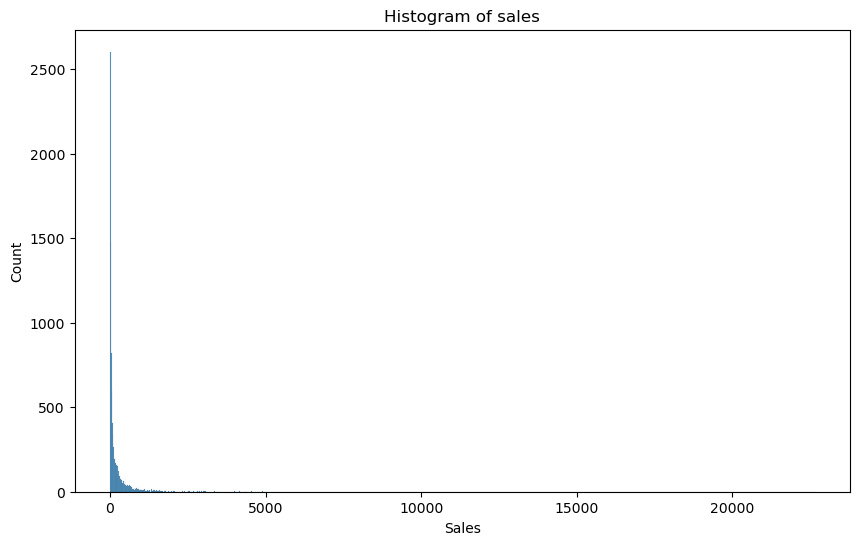

In [482]:
# Creating a histplot of sales to determine skewness
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_df, x="Sales")

plt.title("Histogram of sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

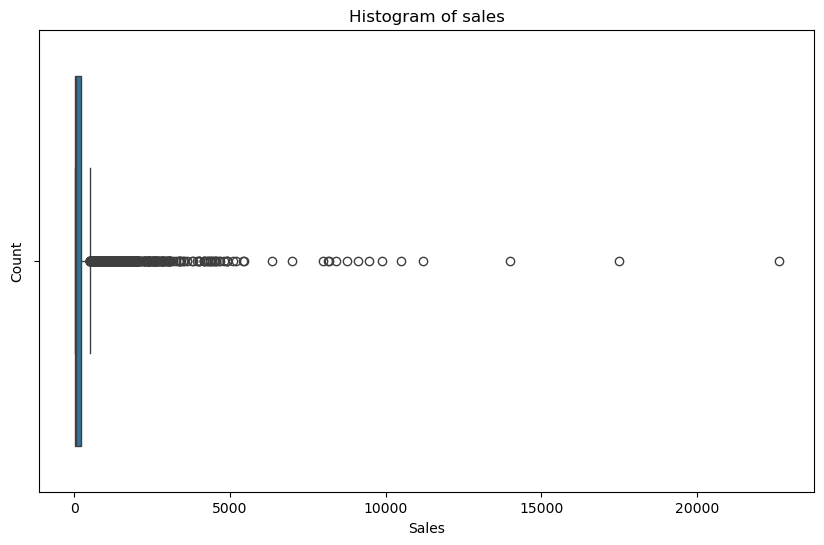

In [483]:
# Determining sales outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df, x="Sales")

plt.title("Histogram of sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

In [484]:
# Sorting the dataframe by order data
sales_df = sales_df.sort_values(by=["Order Date"])

# Creating year, months, months elapsed and day of month features
sales_df["Year"] = sales_df["Order Date"].dt.year
sales_df["Month"] = sales_df["Order Date"].dt.month
sales_df["Months_elapsed"] = (sales_df["Order Date"].dt.year - sales_df["Order Date"].dt.year.min()) * 12 + sales_df["Order Date"].dt.month
sales_df["Day_of_month"] = sales_df["Order Date"].dt.day

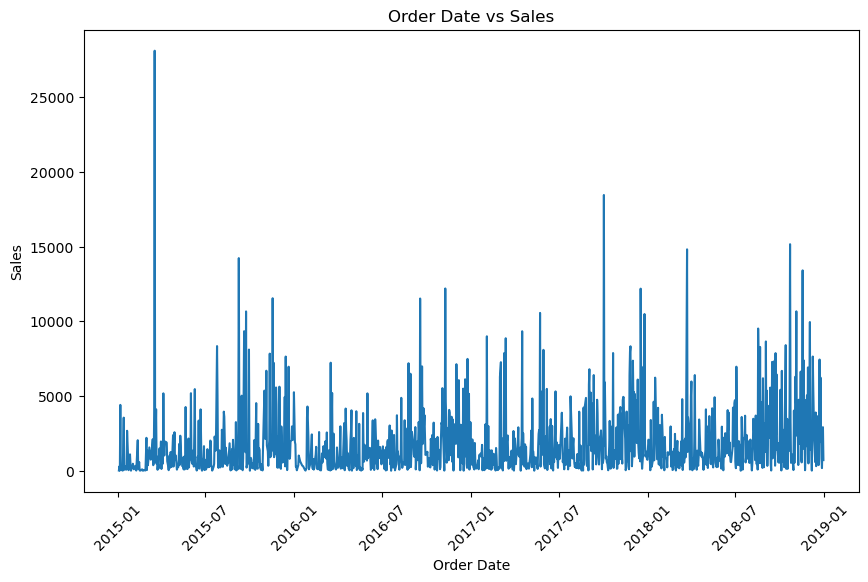

In [485]:
# Creating a line plot of total sales by order date
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Order Date", y="Sales", estimator="sum", errorbar=None)

plt.title("Order Date vs Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

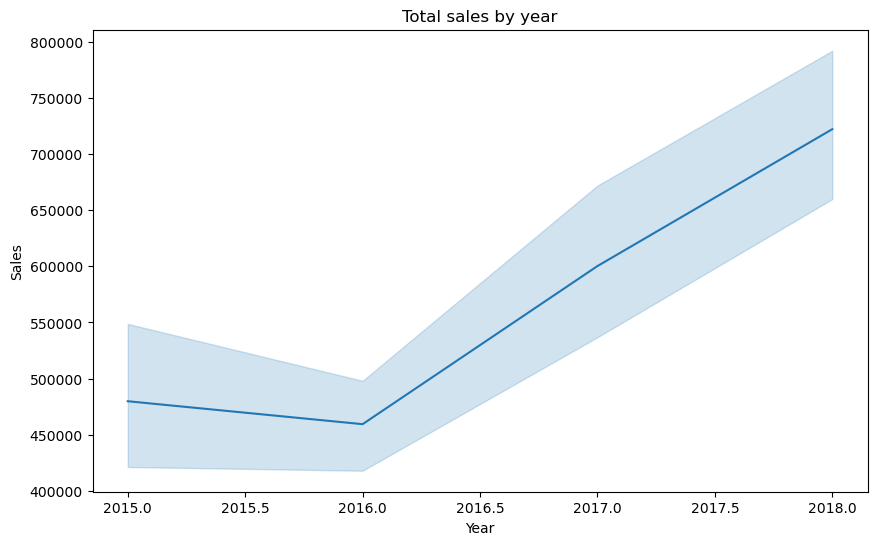

In [486]:
# Creating a line plot of total sales by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Year", y="Sales", estimator="sum")

plt.title("Total sales by year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

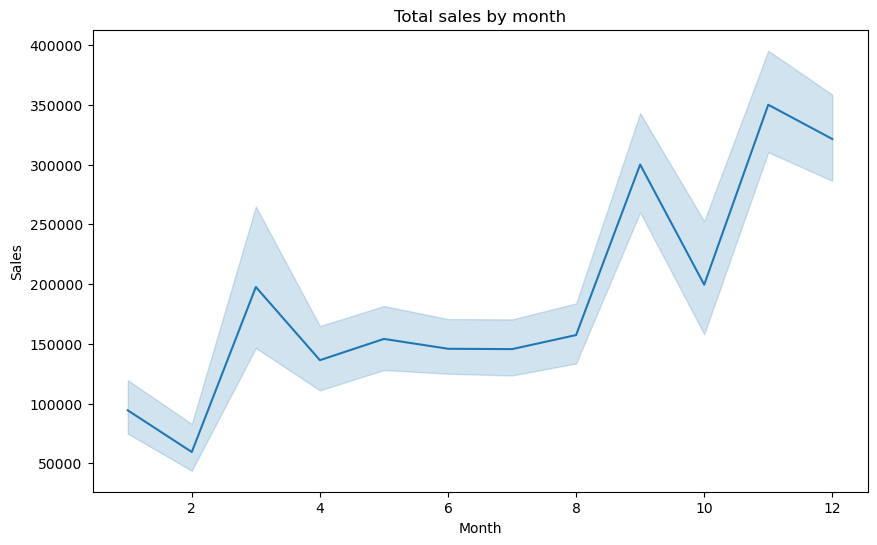

In [487]:
# Creating a line plot of total sales by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Month", y="Sales", estimator="sum")

plt.title("Total sales by month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

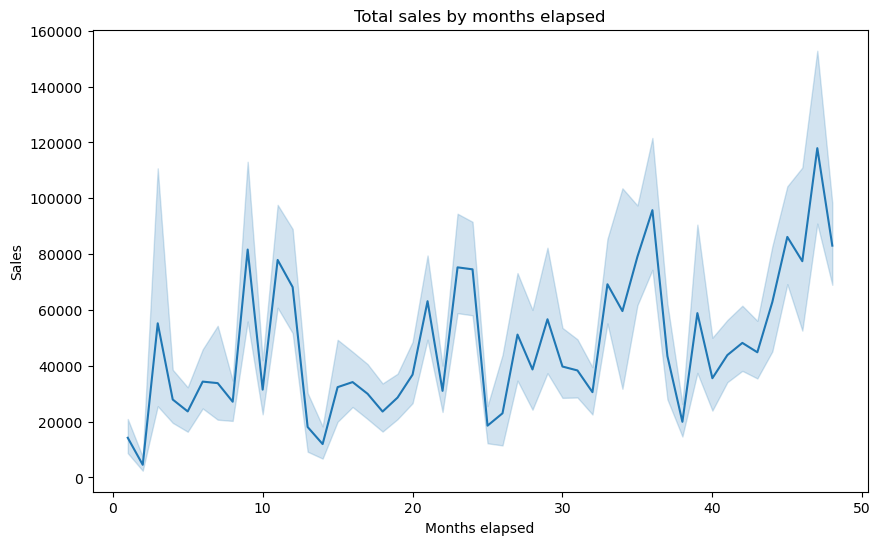

In [488]:
# Creating a line plot of total sales by months elapsed since 2015 (dataset start date)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Months_elapsed", y="Sales", estimator="sum")

plt.title("Total sales by months elapsed")
plt.xlabel("Months elapsed")
plt.ylabel("Sales")
plt.show()

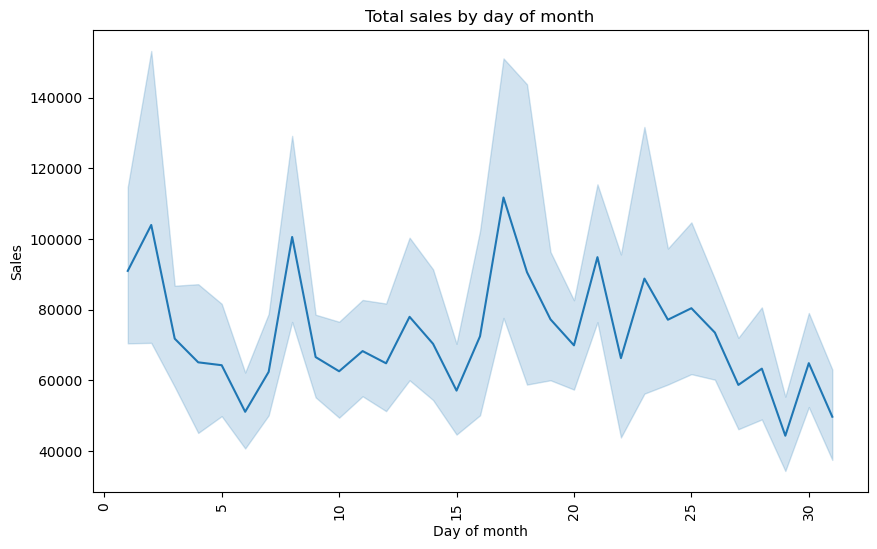

In [489]:
# Creating a line plot of total sales by day of the month
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Day_of_month", y="Sales", estimator="sum")

plt.title("Total sales by day of month")
plt.xticks(rotation=90)
plt.xlabel("Day of month")
plt.ylabel("Sales")
plt.show()

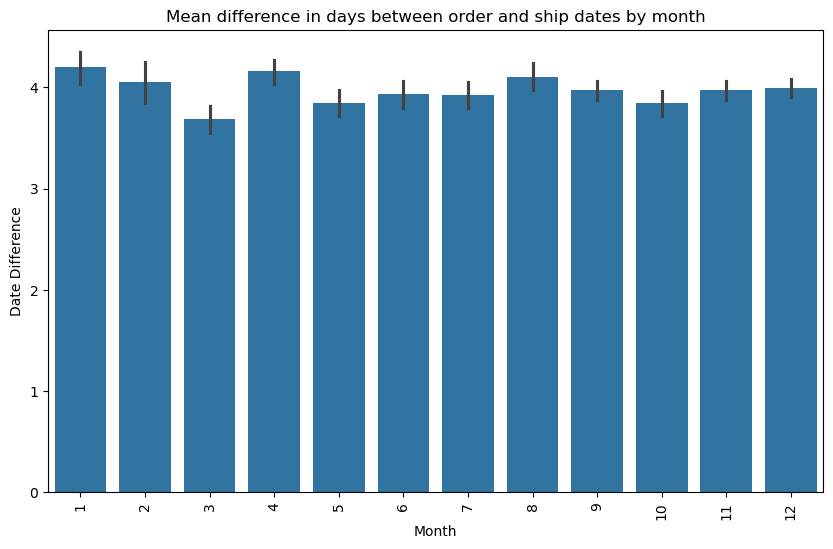

In [490]:
# Creating a bar plot of the mean date difference between order date and ship date for each month
sales_df["Date Difference"] = (sales_df["Ship Date"] - sales_df["Order Date"]).dt.days

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Month", y="Date Difference", estimator="mean")

plt.title("Mean difference in days between order and ship dates by month")
plt.xticks(rotation=90)
plt.show()

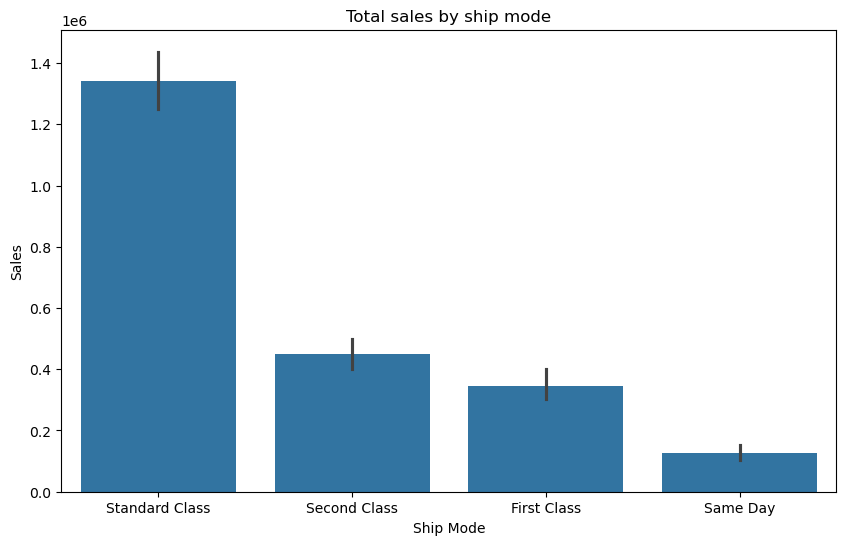

In [491]:
# Creating a barplot of total sales by ship mode
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Ship Mode", y="Sales", estimator="sum")

plt.title("Total sales by ship mode")
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

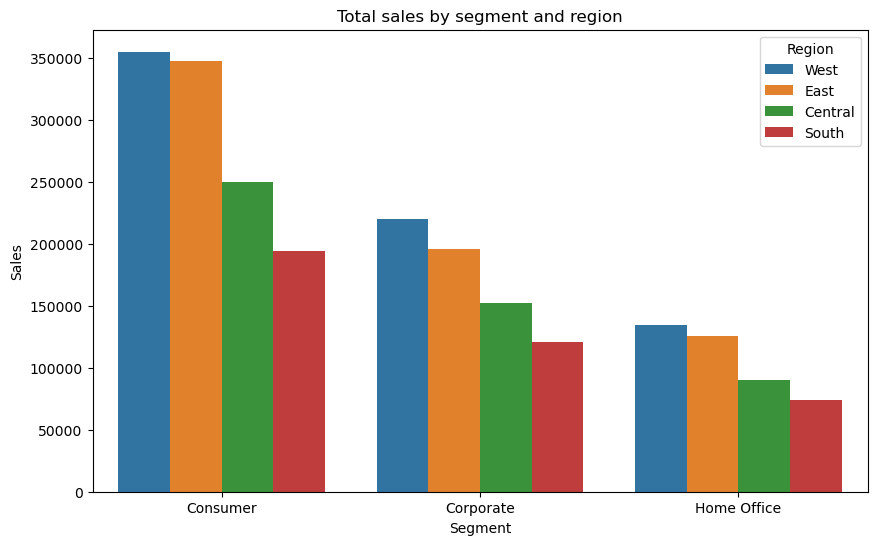

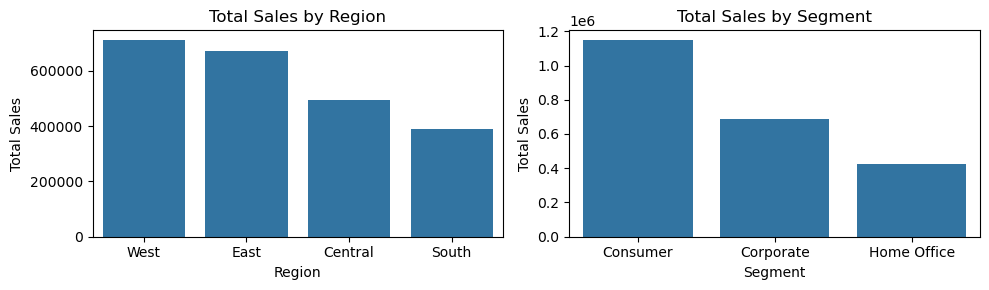

In [492]:
# Creating a barplot of total sales by segment and region
plt.figure(figsize=(10, 6))
segment_sales = sales_df.groupby(["Region", "Segment"], as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=segment_sales, x="Segment", y="Sales", hue="Region")

plt.title("Total sales by segment and region")
plt.xlabel("Segment")
plt.ylabel("Sales")

# Creating barplots of total sales by region and total sales by segment
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
region_total_sales = sales_df.groupby("Region", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Region", y="Sales", ax=axes[0])
axes[0].set_title("Total Sales by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Total Sales")

region_total_sales = sales_df.groupby("Segment", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Segment", y="Sales", ax=axes[1])
axes[1].set_title("Total Sales by Segment")
axes[1].set_xlabel("Segment")
axes[1].set_ylabel("Total Sales")

# Prevents overlapping plot elements
plt.tight_layout()
plt.show()

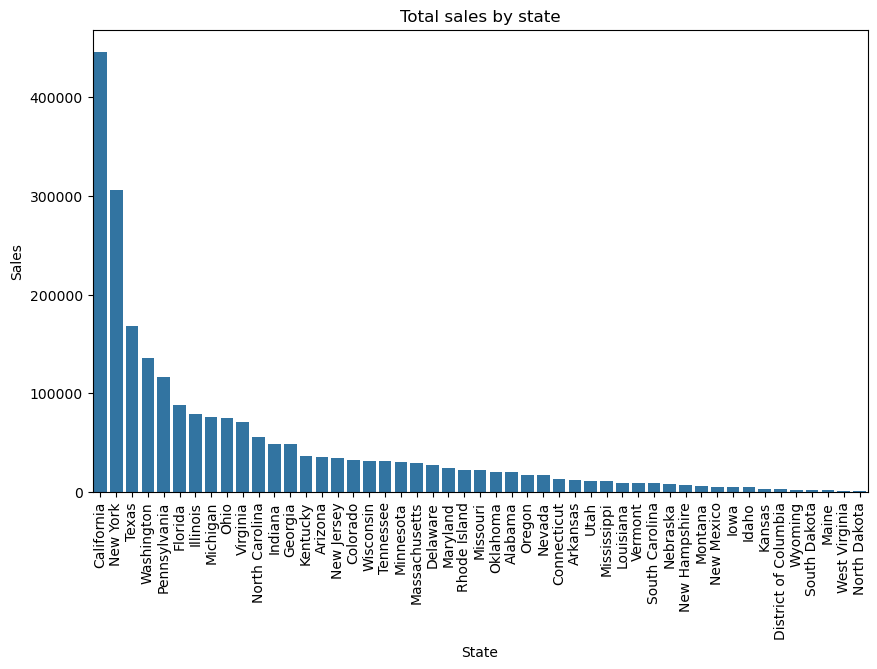

In [493]:
# Creating a bar plot of total sales by state
plt.figure(figsize=(10, 6))
state_sales = sales_df.groupby("State", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=state_sales, x="State", y="Sales")

plt.title("Total sales by state")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()

In [494]:
# Installing folium for geographical plotting 
!pip install folium -q

In [495]:
# Creating a choropleth map of total sales by state
import folium

# Getting the total sales for each state
state_sales = sales_df.groupby("State", as_index=False)["Sales"].sum()

# Loading the geoJSON data of states in USA
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json"

# Creating a map of USA
USA_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Ensuring the state column matches the state key in the geoJSON file
state_sales = state_sales.rename(columns={"State": "name"})

# Creating the choropleth map
folium.Choropleth(
    geo_data=geojson_url, 
    name="Total sales by state", 
    data=state_sales, 
    columns=["name", "Sales"], 
    key_on="feature.properties.name", # Location of key to state value in geojson file 
    fill_color="YlOrRd",
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name="Total Sales",
).add_to(USA_map)

# Adding tooltips with state names to the choropleth map
folium.GeoJson(
    data=geojson_url, 
    name="State names", 
    style_function=lambda feature: {
        "fillColor": "transparent", 
        "color": "transparent", 
        "weight": 0.2,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"], 
        aliases=["State:"], 
        style=("background-color: white; color: black; font-size: 12px; padding: 3px;")
    )
).add_to(USA_map)

USA_map

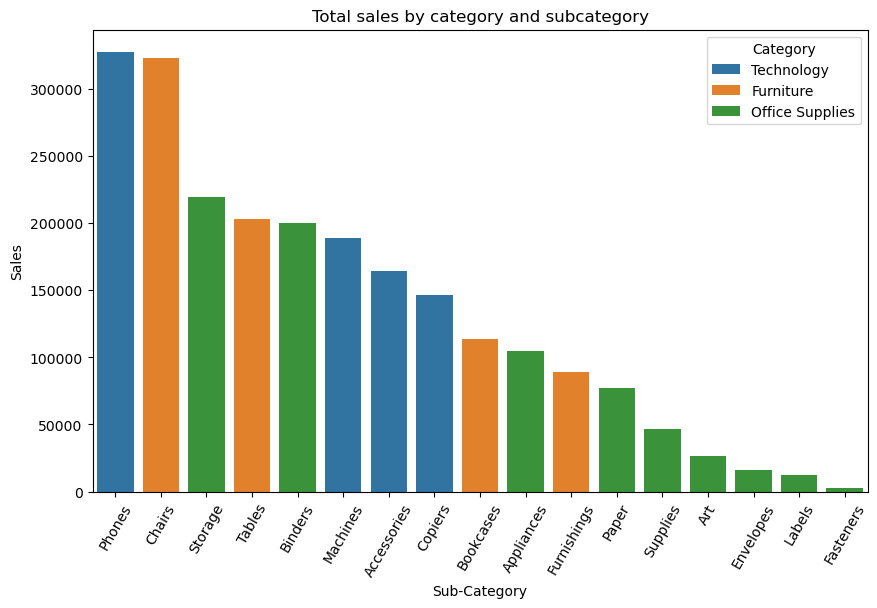

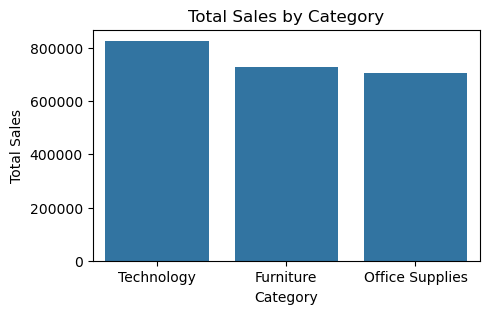

In [496]:
# Creating a barplot of sales by category and subcategory
plt.figure(figsize=(10, 6))
sub_category_sales = sales_df.groupby(["Category", "Sub-Category"], as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=sub_category_sales, x="Sub-Category", y="Sales", hue="Category")

plt.title("Total sales by category and subcategory")
plt.xticks(rotation=60)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")

# Creating barplots of total sales by category and total sales by subcategory
plt.figure(figsize=(5, 3))
region_total_sales = sales_df.groupby("Category", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Category", y="Sales")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

### EDA Overview
- The only feature with null values is the Postal Code feature which shows the geographical location of the customer. Since it has high cardinality and is a categorical feature and we have other lower cardinality geographical features available, it is however redundant, so no imputation is needed. 
- We change the formatting of the Order Date and Ship Date features to datetime.
- We see that the minimum value of sales is 0.44, the maximum is 22638 and 75% of values fall below 210, indicating that it is heavily skewed to the left.
- We create time features to get a greater understanding of trends and seasonality in the sales data. We see a yearly linear upwards trend, and a repeating yearly seasonal cycle. 
- The mean difference between order date and shipping date is fairly consistent around 4 days. 
- We see that by far the most popular shipping mode is the standard class.
- For the regions and segments, we see that the order of total sales is west, east, central and south and consumer, corporate and home office. The west and east regions have fairly similar total sales, but the consumer segment is far ahead of the corporate segment, indicating that the consumer segment is by far the most common customer. 
- California and New York is far ahead of every other state in terms of total sales with California amassing sales of more than 450,000, New York of about 300,000 and the closest contender Texas of less than 200,000. 
-  The subcategories with the most total sales are phones and chairs. These sub-categories are far ahead of the rest, with storage being the closest contender. The total sales for each major category is however quite equal with the technology category being slightly higher with about 100,000 more in total sales than the other categories of furniture and office supplies. 

# Data Preprocessing

We perform final data cleaning to prepare for time series analysis.
We check the data for missing or invalid values as well as duplicates, drop unnecessary features and create new ones.

In [500]:
# Ensuring that there are no missing values
sales_df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code        11
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Year                0
Month               0
Months_elapsed      0
Day_of_month        0
Date Difference     0
dtype: int64

In [501]:
# Checking for duplicate rows
sales_df.duplicated().sum()

0

In [502]:
# Checking for invalid names
invalid_names = sales_df[sales_df["Customer Name"].str.contains(r"\d", na=False)]
invalid_names

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Months_elapsed,Day_of_month,Date Difference


In [503]:
# Ensuring no string values have leading or trailing spaces
sales_df = sales_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [504]:
# Checking the cardinality of features
sales_df.nunique()

Row ID             9800
Order ID           4922
Order Date         1230
Ship Date          1326
Ship Mode             4
Customer ID         793
Customer Name       793
Segment               3
Country               1
City                529
State                49
Postal Code         626
Region                4
Product ID         1861
Category              3
Sub-Category         17
Product Name       1849
Sales              5757
Year                  4
Month                12
Months_elapsed       48
Day_of_month         31
Date Difference       8
dtype: int64

In [505]:
# Removing high cardinality, redundant and unique identifier features from the final dataframe
sales_df_final = sales_df.copy()
sales_df_final.drop(["Row ID", "Order ID", "Customer ID", "Customer Name", "Product ID", "Product Name", "City", "Postal Code", "Ship Date"], axis=1, inplace=True)
sales_df_final.columns

Index(['Order Date', 'Ship Mode', 'Segment', 'Country', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Year', 'Month', 'Months_elapsed',
       'Day_of_month', 'Date Difference'],
      dtype='object')

### Data Preprocessing Overview
- There are no duplicated values
- The only missing values was for the postal codes feature, which we do not need
- There are no invalid names containing digits
- We ensure string values have no leading or trailing spaces
- We remove high cardinality, redundant and unique identifier features from the final dataframe

# Model Training and Evaluation

We train statistical models to make sales forecasts.

In [509]:
# Installing packages
!pip install pmdarima -q

In [510]:
# Importing packages
# Mathematical operations
import numpy as np

# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Parameter selection
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

In [511]:
# Data preparation
# Creating sales DataFrame with Order Date as index
sales_by_order_date = sales_df_final.set_index("Order Date")

# Using winsorization to cap extreme outliers
upper_limit = sales_by_order_date["Sales"].quantile(0.99)
sales_by_order_date["Sales"] = sales_by_order_date["Sales"].clip(upper=upper_limit)

# Aggregating daily sales to monthly sales 
monthly_sales = sales_by_order_date.resample("ME").sum()

# Reducing skewness of data to prepare it for statistical modeling
monthly_sales["Log_sales"] = np.log1p(monthly_sales["Sales"])

# Splitting historical sales data into training and test datasets
test_period = 6
train_data = monthly_sales.iloc[:-test_period]
test_data = monthly_sales.iloc[-test_period:]

# Getting the true sales values for the test_data
y_true = test_data["Sales"].values

# Selecting historical sales data to display
months_to_show = 24
start_display_date = monthly_sales.index[-1] - pd.DateOffset(months=months_to_show)
historical_sales = monthly_sales[monthly_sales.index >= start_display_date]

In [512]:
# Creating a function to make evaluation metrics for a given model
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_forecast_error = np.mean(y_pred - y_true)

    evaluations = (f"{model_name}\nmae: {mae}\nrmse: {rmse}\nmape: {mape}\nmean_forecast_error: {mean_forecast_error}")

    return evaluations

Best ARIMA parameters: (0, 1, 2)
arima_model
mae: 32186.700594393016
rmse: 37905.57713387075
mape: 0.39682133617804194
mean_forecast_error: -32186.700594393016


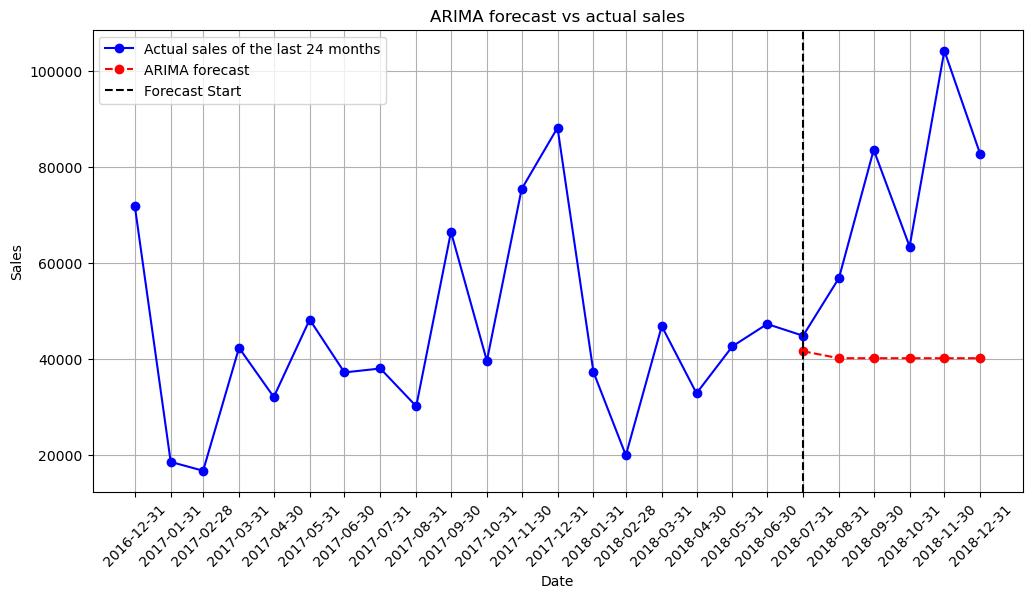

In [513]:
# Making an ARIMA forecast
# Iteratively finding the best parameters
arima_model = pm.auto_arima(train_data["Log_sales"], seasonal=False, stepwise=True, trace=False)
print("Best ARIMA parameters:", arima_model.order) 

# Making a 6 months log sales forecast with the model
arima_log_predictions = arima_model.predict(n_periods=len(test_data))

# Inversing log1p on predictions to get sales values in the original scale
arima_predictions = np.expm1(arima_log_predictions)

# Showing evaluation metrics
arima_evaluation = evaluate_model("arima_model", y_true, arima_predictions)
print(arima_evaluation)

# Plotting actual sales data for the last 24 months
plt.figure(figsize=(12,6))
plt.plot(historical_sales.index, historical_sales["Sales"], marker = "o", label="Actual sales of the last 24 months", color="blue")

# Plotting ARIMA predictions for the next 6 months
plt.plot(test_data.index, arima_predictions, marker = "o", label="ARIMA forecast", color="red", linestyle="dashed")

# Formatting forecasting plot
plt.title("ARIMA forecast vs actual sales")
plt.xlabel("Date")
plt.xticks(historical_sales.index, rotation=45)
plt.ylabel("Sales")
plt.axvline(x=test_data.index[0], color='black', linestyle='--', label="Forecast Start")
plt.legend()
plt.grid(True)
plt.show()

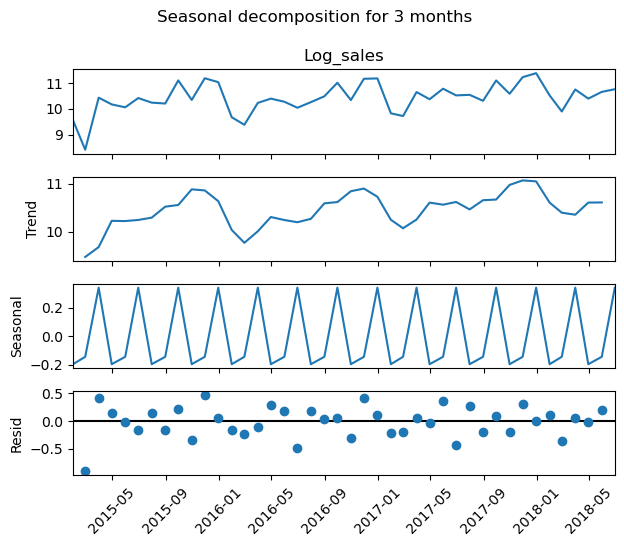

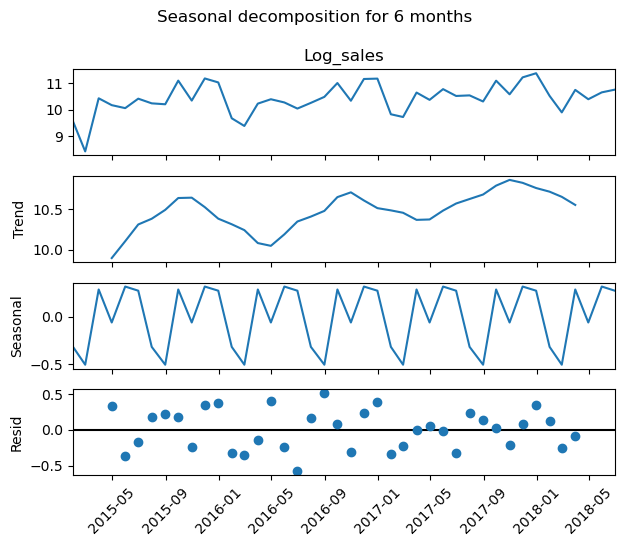

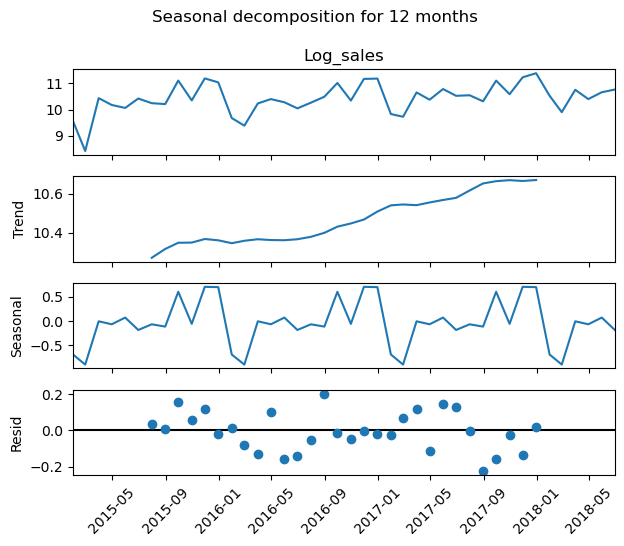

In [514]:
# Determining seasonality of sales data
m_values = [3, 6, 12]

for value in m_values:
    decomposition = seasonal_decompose(train_data["Log_sales"], model="additive", period=value)
    decomposition.plot()
    plt.suptitle(f"Seasonal decomposition for {value} months", y=1.05)
    plt.xticks(rotation=45)
    
plt.show()

Best SARIMA parameters: (0, 1, 1) (1, 0, 0, 12)
sarima_model
mae: 14055.953493911546
rmse: 15953.620687245204
mape: 0.19160604979389342
mean_forecast_error: -10539.28618296507


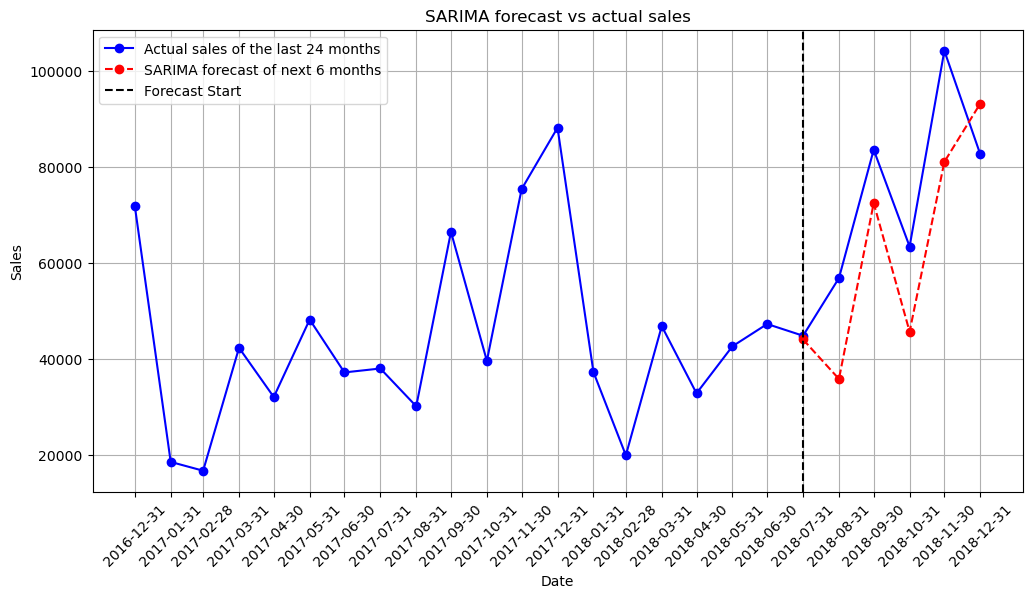

In [515]:
# Making a SARIMA forecast
# Iteratively finding the best parameters with m == 12 since this seasonality best matches the actual data in the seasonal decomposition plot.
sarima_model = pm.auto_arima(train_data["Log_sales"], m=12, seasonal=True, stepwise=True, trace=False)
print("Best SARIMA parameters:", sarima_model.order, sarima_model.seasonal_order) 

# Making a 6 months log sales forecast with the model
sarima_log_predictions = sarima_model.predict(n_periods=len(test_data))

# Inversing log1p on predictions to get sales values in the original scale
sarima_predictions = np.expm1(sarima_log_predictions)

# Showing evaluation metrics
sarima_evaluation = evaluate_model("sarima_model", y_true, sarima_predictions)
print(sarima_evaluation)

# Plotting actual sales data for the last 24 months
plt.figure(figsize=(12,6))
plt.plot(historical_sales.index, historical_sales["Sales"], marker = "o", label="Actual sales of the last 24 months", color="blue")

# Plotting SARIMA predictions for the next 6 months
plt.plot(test_data.index, sarima_predictions, marker = "o", label="SARIMA forecast of next 6 months", color="red", linestyle="dashed")

# Formatting forecasting plot
plt.title("SARIMA forecast vs actual sales")
plt.xlabel("Date")
plt.xticks(historical_sales.index, rotation=45)
plt.ylabel("Sales")
plt.axvline(x=test_data.index[0], color='black', linestyle='--', label="Forecast Start")
plt.legend()
plt.grid(True)
plt.show()

hw_model
mae: 10538.430082223678
rmse: 13160.994252621025
mape: 0.14738083848536085
mean_forecast_error: 1773.9201395197172


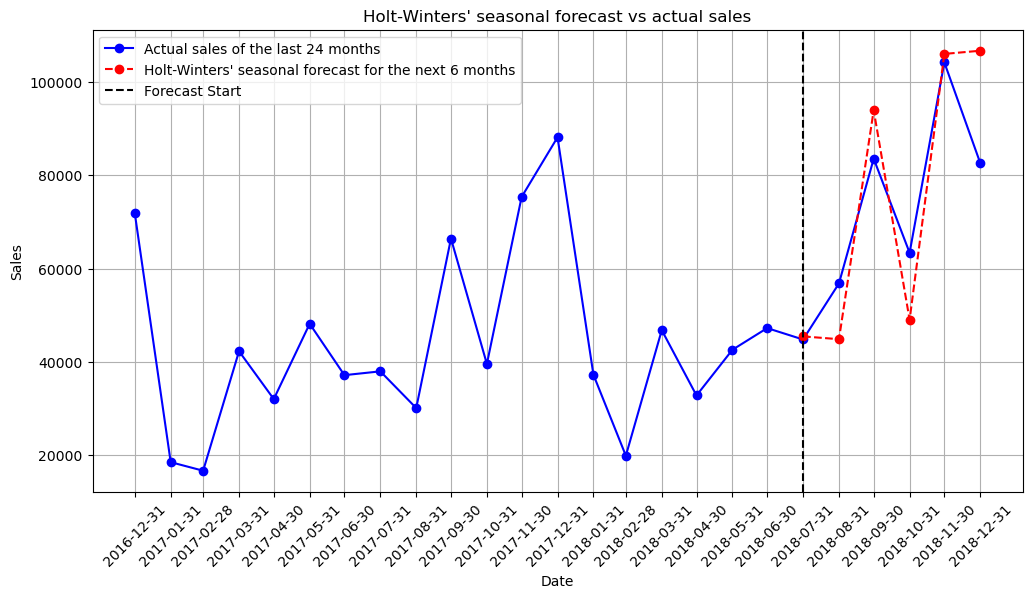

In [516]:
# Making a Holt-Winters' Seasonal forecast
# Creating the model. Seasonal decomposition showed a linear trend and seasonality (consistent peaks and troughs)
hw_model = ExponentialSmoothing(train_data["Log_sales"], trend="additive", seasonal="additive", initialization_method="estimated")

# Fitting the model
hw_model = hw_model.fit()

# Making a 6 months log sales forecast with the model
hw_log_predictions = hw_model.forecast(len(test_data))

# Inversing log1p on predictions to get sales values in the original scale
hw_predictions = np.expm1(hw_log_predictions)

# Showing evaluation metrics
hw_evaluation = evaluate_model("hw_model", y_true, hw_predictions)
print(hw_evaluation)

# Plotting actual sales data for the last 24 months
plt.figure(figsize=(12,6))
plt.plot(historical_sales.index, historical_sales["Sales"], marker = "o", label="Actual sales of the last 24 months", color="blue")

# Plotting holt-winters' seasonal predictions for the next 6 months
plt.plot(test_data.index, hw_predictions, marker = "o", label="Holt-Winters' seasonal forecast for the next 6 months", color="red", linestyle="dashed")

# Formatting forecasting plot
plt.title("Holt-Winters' seasonal forecast vs actual sales")
plt.xlabel("Date")
plt.xticks(historical_sales.index, rotation=45)
plt.ylabel("Sales")
plt.axvline(x=test_data.index[0], color='black', linestyle='--', label="Forecast Start")
plt.legend()
plt.grid(True)
plt.show()

In [517]:
# Evaluating statistical models
print(f"{arima_evaluation}\n")
print(f"{sarima_evaluation}\n")
print(f"{hw_evaluation}\n")

arima_model
mae: 32186.700594393016
rmse: 37905.57713387075
mape: 0.39682133617804194
mean_forecast_error: -32186.700594393016

sarima_model
mae: 14055.953493911546
rmse: 15953.620687245204
mape: 0.19160604979389342
mean_forecast_error: -10539.28618296507

hw_model
mae: 10538.430082223678
rmse: 13160.994252621025
mape: 0.14738083848536085
mean_forecast_error: 1773.9201395197172



### Model Training and Evaluation Overview
- We train and evaluate the statistical models of ARIMA, SARIMA and exponential smoothing
- We prepare the data for statistical modeling by using winsorization to cap extreme outliers and reducing skewness of the sales by calculating the logarithm of the sales values. We use a test period of 6 months and actual sales of 24 months. 
- We make an evaluation function to calculate evaluation metrics for the given model
- The ARIMA model does not capture the patterns of the sales values at all and has a mean average percentage error (mape) of 0.40.
- The seasonal decomposition plot shows a linear trend and a yearly seasonal cycle with consistent highs and lows, indicating linearity in seasonality
- The SARIMA model is trained using the yearly seasonal cycle and is much better than ARIMA at capturing patterns with a mean average percentage error (mape) of 0.19.
- The exponential smoothing model is applied with additive seasonality and trend, creating the Holt-Winters' seasonal model. This model is even better at capturing patterns than SARIMA with a mean average percentage error (mape) of 0.15. 
- We determine that the Holt-Winters' seasonal model is the best statistical model for predicting the sales values

# Model Interpretation

We explain how different features contribute to the model's predictions.  

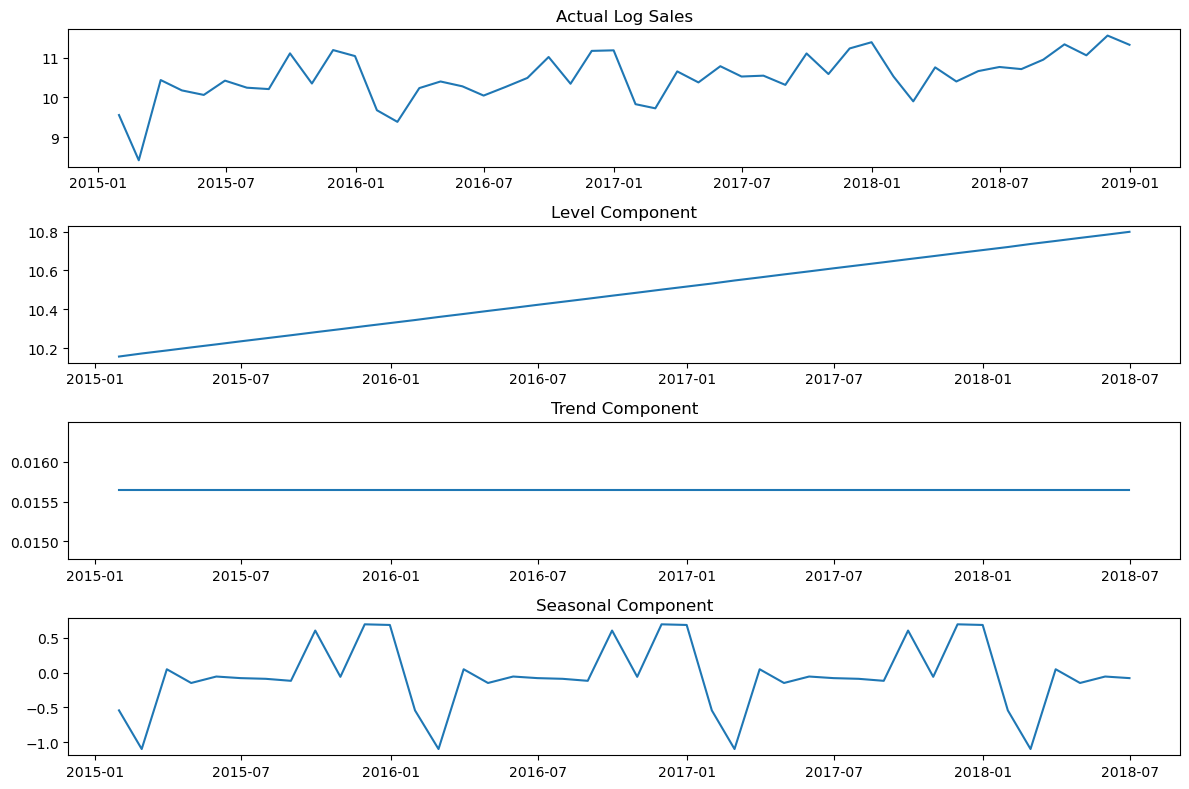

In [521]:
# Visualizing decomposition components of the Holt-Winters' model
plt.figure(figsize=(12, 8))

# Plotting actual sales
plt.subplot(4, 1, 1)
plt.plot(monthly_sales["Log_sales"], label="Actual Log Sales")
plt.title("Actual Log Sales")

# Plotting the level component
plt.subplot(4, 1, 2)
plt.plot(hw_model.level, label="Level")
plt.title("Level Component")

# Plotting the trend component
plt.subplot(4, 1, 3)
plt.plot(hw_model.trend, label="Trend")
plt.title("Trend Component")

# Plotting the seasonal component
plt.subplot(4, 1, 4)
plt.plot(hw_model.season, label="Seasonality")
plt.title("Seasonal Component")

plt.tight_layout()
plt.show()

### Holt-Winters' Components
- The level represents the baseline value of the time series at a given time. Since the level component is linearly increasing it captures the gradual growth of the sales values over time. 
- The trend component represents how the level evolves over time. Since it is flat it indicates that there is no long-term trend beyond what is already captured by the level component. This means that the growth of the sales values are entirely captured by the level component.
- The seasonal component specifies the yearly cycle of ups and downs. We can see that sales drops in the beginning of the year, gradually increases during the year and spikes at the very end. 

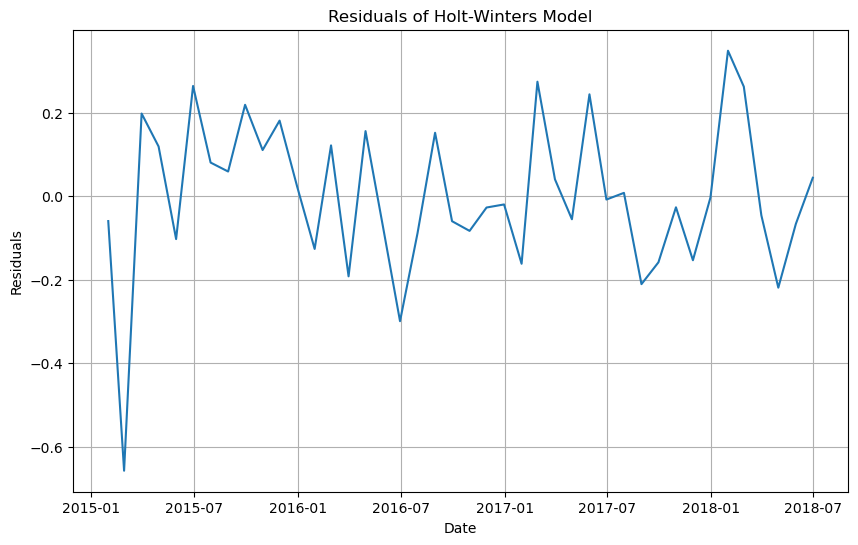

In [523]:
# Plotting Holt-Winters' training data residuals
residuals = train_data["Log_sales"] - hw_model.fittedvalues
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of Holt-Winters Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

### Holt-Winters' residuals
- We can see that the residuals oscillate around 0, spiking at about 0.3 and -0.6, showing that the model has quite a bit of variation in its residuals. The model therefore seems to have difficulties determining certain patterns in sales, possibly due to the limitations of the model to capture the complexity of the fluctuating movements of sales. The oscillation does however indicates that the model is unbiased with no consistent over- or underprediction of values. 

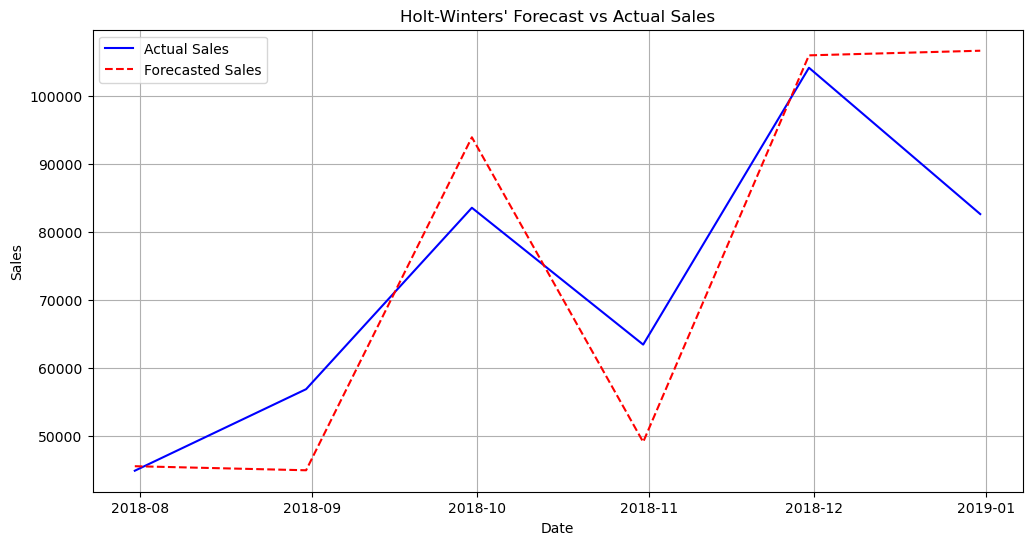

In [525]:
# Plotting the forecasted values vs actual values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Sales'], label="Actual Sales", color="blue")
plt.plot(test_data.index, hw_predictions, label="Forecasted Sales", color="red", linestyle="dashed")
plt.title("Holt-Winters' Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

### Holt-Winters' forecasting errors
We see here that the model on average is quite good at predicting the sales values, capturing the trend of the sales, but having a general tendency to over- or underevaluate the sales value.  

# Model Deployment

We deploy the model to an interactive streamlit dashboard, showing a variety of visualizations. 

### Streamlit Layout Description
- A sidebar for filtering the dataset by region, category, year and month through selection and deselection. The sidebar filtering impacts:
    - Showing the first 5 rows of the filtered dataset.
    - A bar plot of segment sales for the filtered data 
- Lineplot of actual sales vs forecasted sales.
    - Specify period of at least 12 months to show actual sales for this period.
    - Specify a forecast horizon from 1 to 6 months to show forecast values for the end of the actual sales period. 
- Line plot of residuals for forecasted values.
    - Shows the error of each forecasted value.
    - If the residual is positive, the actual value was higher, if it is negative, the actual value was lower.
- Bar plot of percentage errors of forecasted values.
    - Shows the relative absolute errors of each forecasted value. 

### Using the streamlit app
- The app is accessible by a link in the project's github repository, in the readme.md file, under the model deployment section.
- The app has cached data loading and loads the visuals quickly, allowing for interactive analysis in real-time.

In [531]:
# Saving variables for the streamlit app (streamlit_sales_dashboard.py)
sales_monthly = monthly_sales
sales_complete = sales_df_final

sales_monthly.to_parquet("data/sales_monthly.parquet", index=True)
sales_complete.to_parquet("data/sales_complete.parquet", index=False)

### Model Deployment Overview
We make an interactive streamlit dashboard with the following features:
- Sidebar filters to filter the data by.
- The first 5 rows of the filtered dataset.
- Actual sales vs forecasted sales
- Residuals for forecasted values
- Absolute percentage errors for forecasted values

Using the app:
 - The app is accessed by link and executes quickly with cached data loading and interactive real-time analysis.